## Let's collect some data

- Anxiety and exam performance​

- Participants:​

    - you!

- Measures​

    - Time spent revising (hours)​

    - Exam performance (%)​

    - Exam anxiety (1 to 100)

    - Sex (M/F)


Let's collect this data! 


https://londoninterdisciplinary-my.sharepoint.com/:x:/g/personal/niccolo_pescetelli_lis_ac_uk/EQgM6t2VqFRNp-dBPar39usBk-uv9z2LfzL5xbhxMiZXgA?e=awaicW


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# read in the data
examData = pd.read_csv('/Users/olisa/Lis/data_sci/week4/Data/Exam Anxiety.txt', index_col=0, delimiter='\t')
examData.head(10)

,Revise,Exam,Anxiety,Gender
Code,,,,
1,4,40,86.298,Male
2,11,65,88.716,Female
3,27,80,70.178,Male
4,53,80,61.312,Male
5,4,40,89.522,Male
6,22,70,60.506,Female
7,16,20,81.462,Female
8,21,55,75.820,Female
9,25,50,69.372,Female


In [41]:


examData.rename(columns={'Revise': 'Time spent revising', 'Exam': 'Exam performance', 'Anxiety' : 'Anxiety level', 'Gender' : 'Sex', }, inplace=True)
print(examData.columns)



Index(['Time spent revising', 'Exam performance', 'Anxiety level', 'Sex'], dtype='object')


Let's visualise the distribution of Anxiety level and Exam performance. We plot the x and y into two separate plots.

IndexError: list index out of range

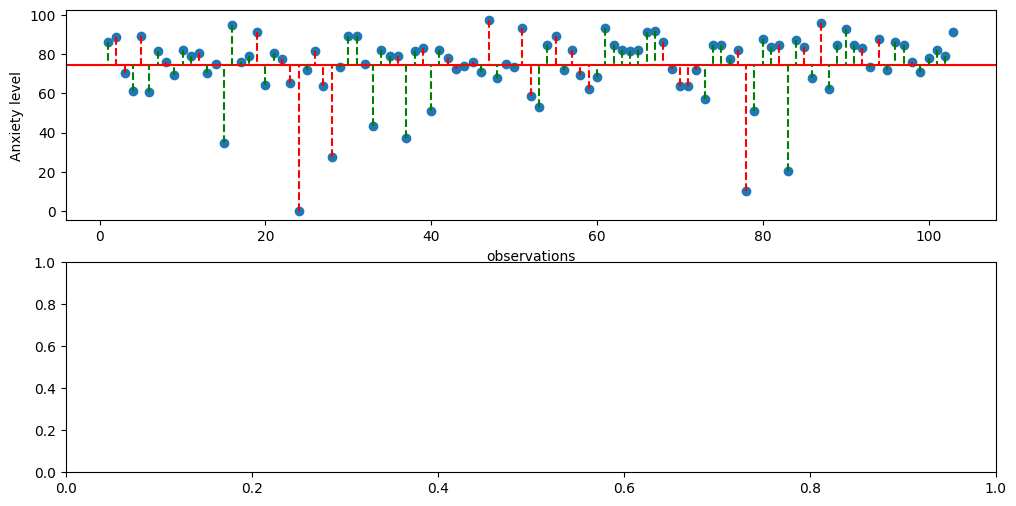

In [42]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

x = examData.index
y1=examData['Anxiety level']
y2=examData['Exam performance']

axes[0].scatter(x, y1)
axes[0].axhline(np.mean(y1), color='red', linestyle='-')
axes[0].set_ylabel('Anxiety level')
axes[0].set_xlabel('observations')
colors1 = ['green' if y1[i] > np.mean(y1) else 'red' for i in x]

for i in x:
    axes[0].plot([i, i], [y1[i], np.mean(y1)], color=colors1[i], linestyle='--')

axes[1].scatter(x, y2)
axes[1].axhline(np.mean(y2), color='red', linestyle='-')
axes[1].set_ylabel('Exam performance')
axes[1].set_xlabel('observations')
colors2 = ['green' if y2[i] > np.mean(y2) else 'red' for i in x]

for i in x:
    axes[1].plot([i, i], [y2[i], np.mean(y2)], color=colors2[i], linestyle='--')



Now, let's plot the two variables on a scatterplot, with the mean of each variable superimposed

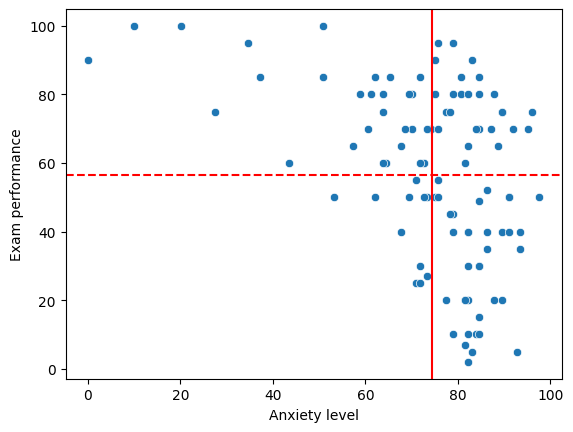

In [43]:
sns.scatterplot(data=examData, x='Anxiety level', y='Exam performance')
plt.axvline(np.mean(examData['Anxiety level']), color='red')
plt.axhline(np.mean(examData['Exam performance']), color='red', linestyle='--')

## How to build a correlation coefficient from scratch
Think of the following: 
- Where are the data points distributed in a positive correlation? 
- Where are the data points distributed in a negative correlation? 
- How can we capture this relationship with a number?

Let's start from the definition of covariance: 
$$\sigma^2 = \frac{\sum{(x_i - \bar{x})^2}}{N-1}$$ 

How would you implement this definition in computational terms?

In [44]:
import numpy as np

def variance(X):
    """
    Compute the variance of a dataset X.
    
    Parameters:
    X (list or np.ndarray): Dataset.
    
    Returns:
    float: Variance of X.
    """
    # Calculate the mean of X
    mean_X = np.mean(X)
    
    # Compute the deviations from the mean
    deviations = X - mean_X
    
    # Compute the variance
    variance_value = np.sum(deviations ** 2) / (len(X) - 1)
    
    return variance_value

# Example 
X = np.array([1, 2, 3, 4, 5])

var_value = variance(X)
print(f"Variance of X: {var_value}")

Variance of X: 2.5


Can you modify the code above to compute the co-variance? 
Remember, the formula of the covariance is: 

$$cov(x,y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{N-1}$$ 

In [49]:
def covariance(X, Y):
    """
    Compute the covariance between two datasets X and Y.
    
    Parameters:
    X (list or np.ndarray): First dataset.
    Y (list or np.ndarray): Second dataset.
    
    Returns:
    float: Covariance between X and Y.
    """
    # Ensure X and Y have the same length
    if len(X) != len(Y):
        raise ValueError("Datasets X and Y must have the same length")
    
    # Calculate the means of X and Y
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    
    # Compute the deviations from the mean
    deviations_X = X - mean_X
    deviations_Y = Y - mean_Y
    
    # Compute the covariance
    covariance_value = np.sum(deviations_X * deviations_Y) / (len(X) - 1)
    
    return covariance_value

# Example usage
X = examData['Time spent revising']
Y = examData['Exam performance']

cov_value = covariance(X, Y)
print(f"Covariance between X and Y: {cov_value}")

Covariance between X and Y: 186.87835522558538


## Standardisation and correlation coefficient
There are some problems with the covariance. 
1. It depends upon the units of measurement.
E.g. the covariance of two variables measured in miles might be 4.25, but if the same scores are converted to kilometres, the covariance is 11.


One solution is to standardise it! To do that, we divide the covariance by the standard deviations of both variables:

$$
r = \frac{cov(x,y)}{s_xs_y} = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{(N-1)s_xs_y}
$$

The standardised version of covariance is known as the _correlation coefficient_.

The correlation coefficient r (a.k.a, Pearson's r) is (relatively) unaffected by units of measurement.




In [22]:
def pearson_correlation(X, Y):
    """
    Compute the Pearson correlation coefficient between two datasets X and Y.
    
    Parameters:
    X (list or np.ndarray): First dataset.
    Y (list or np.ndarray): Second dataset.
    
    Returns:
    float: Pearson correlation coefficient between X and Y.
    """
    # Compute the covariance between X and Y
    cov_XY = covariance(X, Y)
    
    # Compute the standard deviations of X and Y
    std_X = np.sqrt(variance(X))
    std_Y = np.sqrt(variance(Y))
    
    # Compute the Pearson correlation coefficient
    r = cov_XY / (std_X * std_Y)
    
    return r

Luckily for us, we don't need to compute the r correlation coefficient from scratch every time. You can use  ad hoc functions like Numpy's [corrcoef](https://numpy.org/doc/2.0/reference/generated/numpy.corrcoef.html) function.

In [51]:
# the correlation matrix between exam performance and anxiety level
np.corrcoef(examData['Exam performance'], examData['Anxiety level'])

array([[ 1.        , -0.44099341],
       [-0.44099341,  1.        ]])

Using corcoef, you can calculate the correlation matrix between any number of variables.

In [52]:
np.corrcoef(examData.loc[:,['Exam performance', 'Anxiety level', 'Time spent revising']], rowvar=False)

array([[ 1.        , -0.44099341,  0.3967207 ],
       [-0.44099341,  1.        , -0.70924926],
       [ 0.3967207 , -0.70924926,  1.        ]])

### Exercise 1: Exploring Bivariate Correlation

You will now do some exercises on the correlation between exam performance, anxiety level and revision time, using a larger dataset. We are interested in understanding the relationship between anxiety and exam performance​. 

Participants:​

- 103 students​

Measures​

- Time spent revising (hours)​

- Exam performance (%)​

- Exam Anxiety (the EAQ, score out of 100)​

- Gender​

In [53]:
# Load the Exam Anxiety dataset. 
df = pd.read_csv('./data/Exam Anxiety.txt', delimiter='\t') # use tab instead of a comma as delimiter
df.head()

,Code,Revise,Exam,Anxiety,Gender
0,1,4,40,86.298,Male
1,2,11,65,88.716,Female
2,3,27,80,70.178,Male
3,4,53,80,61.312,Male
4,5,4,40,89.522,Male


In [54]:
# compute the correlation matrix between the Exam, Anxiety, and Revise columns
np.corrcoef(examData.loc[:,['Exam performance', 'Anxiety level', 'Time spent revising']], rowvar=False)

array([[ 1.        , -0.44099341,  0.3967207 ],
       [-0.44099341,  1.        , -0.70924926],
       [ 0.3967207 , -0.70924926,  1.        ]])

A correlation matrix simply tells you the correlation coefficient between pairs of variables. It does not tell you whether the correlation is statistically significant. 

To know this, we need to do a correlation _test_. For that, we will use the [pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) function from the scipy.stats library. 

In [55]:
# run a correlation test between the Exam and Anxiety columns
from scipy.stats import pearsonr
pearsonr(df['Anxiety'], df['Exam'])

PearsonRResult(statistic=-0.44099341160878863, pvalue=3.1278727730079566e-06)


1. **Visualizing Correlations**  
   - Create scatter plots for each pair of variables with the correlation coefficient displayed on each plot.
   - **Question:** Does the visual representation support the correlation values calculated above?



2. **Calculate Bivariate Correlations**  
   - Compute the Pearson correlation between all three pairs of variables:
     - Time spent revising and Exam performance.
     - Anxiety level and Exam performance.
     - Time spent revising and Anxiety level.
   - **Question:** Describe any trends you observe. What might these correlations indicate about the relationships between each pair of variables?


In [60]:
# compute the correlation coefficient between two variables of choice in the Exam Anxiety dataset using corrcoef
# your code here

print(pearson_correlation(df['Revise'], df['Exam']))
print(pearson_correlation(df['Anxiety'], df['Exam']))
print(pearson_correlation(df['Revise'], df['Anxiety']))


0.39672069692675677
-0.4409934116087886
-0.709249255109869


3. **Correlation by Subgroups**  
   - Separate the data by sex (M/F) and re-compute the Pearson correlations for each subgroup.
   - **Question:** Compare the correlation values for each subgroup. Are there any notable differences between males and females?



4. **Compute the coefficient of determination $R^2$**

In [53]:
# compute r squared between Exam and Anxiety